In [1]:
import numpy as np

data_set = np.load("dataset_1.npz")

X = data_set['X']
y = data_set['y']

size: [500.0, 500]
dimensionen: [2, 1]
shape: [(500, 2), (500,)]
type: [dtype('float64'), dtype('float64')]

Maximum of Feature 1:   3.0788808084552377
Minimum of Feature 1:   -3.2412673400690726
Average of Feature 1:   0.003601200328091682
Deviation of Feature 1: 0.966067023946438

Maximum of Feature 2:   38.52731490654721
Minimum of Feature 2:   -24.238793266289566
Average of Feature 2:   0.35062911316559336
Deviation of Feature 2: 9.909740486395929

Maximum of Labels:   2.6991598047899807
Minimum of labels:   -2.830089125546282
Average of Labels:   0.0023797552110056673
Deviation of Labels: 1.000146129142124



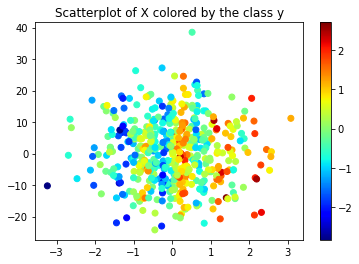

In [2]:
import matplotlib.pyplot as plt
from matplotlib  import cm

def explore_data(data_set,X,y):
    print('size:',[X.size/2,y.size])
    print('dimensionen:',[X.ndim,y.ndim])
    print('shape:',[X.shape,y.shape])
    print('type:',[X.dtype,y.dtype])
    print()
    Xf1 = X[0:, 0]
    Xf2 = X[0:, 1]
    print("Maximum of Feature 1:   " + str(np.amax(Xf1)))
    print("Minimum of Feature 1:   " + str(np.amin(Xf1)))
    print("Average of Feature 1:   " + str(np.average(Xf1)))
    print("Deviation of Feature 1: " + str(np.std(Xf1)))
    print()
    print("Maximum of Feature 2:   " + str(np.amax(Xf2)))
    print("Minimum of Feature 2:   " + str(np.amin(Xf2)))
    print("Average of Feature 2:   " + str(np.average(Xf2)))
    print("Deviation of Feature 2: " + str(np.std(Xf2)))
    print()
    print("Maximum of Labels:   " + str(np.amax(y)))
    print("Minimum of labels:   " + str(np.amin(y)))
    print("Average of Labels:   " + str(np.average(y)))
    print("Deviation of Labels: " + str(np.std(y)))
    print()
    unique, counts = np.unique(y, return_counts=True)
    
    
    #plot the data set    
    scatter_plot(X,y)
    plt.title('Scatterplot of X colored by the class y')
    plt.savefig('scatterplot.eps', format='eps')
    plt.show()

#scatterplot where the dots are coloured after their class/categorie
def scatter_plot(X,y):
    x_0 = [x[0] for x in X]
    x_1 = [x[1] for x in X]
    plt.scatter(x_0, x_1,c=y,cmap=cm.jet)
    plt.colorbar()
    return plt

explore_data(data_set,X,y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


test_r2
LinearRegression()
[ 0.12353972  0.10880717  0.3208986   0.17964354  0.30223186 -0.05720802
  0.04997862  0.15985814  0.2747574   0.1977076 ]
Average of scores: 0.16602146290693626
Ridge()
[ 0.12387709  0.10897753  0.32054798  0.17942364  0.30204701 -0.05671287
  0.05062553  0.15994844  0.27453661  0.19746326]
Average of scores: 0.16607342110066442
HuberRegressor()
[ 0.12757954  0.11580441  0.30867732  0.18380943  0.29167797 -0.05873252
  0.0430457   0.17484905  0.26806956  0.19154903]
Average of scores: 0.1646329497787177

test_neg_mean_squared_error
LinearRegression()
[-0.50893679 -0.96582242 -0.88423245 -0.95925409 -0.70255994 -0.87453085
 -0.77932532 -0.78234414 -0.7189248  -0.84163603]
Average of scores: -0.8017566831938151
Ridge()
[-0.50874089 -0.96563778 -0.88468898 -0.95951122 -0.70274606 -0.87412126
 -0.77879464 -0.78226006 -0.71914367 -0.84189236]
Average of scores: -0.8017536922390368


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


HuberRegressor()
[-0.50659098 -0.95823922 -0.90014532 -0.95438286 -0.71318631 -0.87579192
 -0.78501256 -0.76838454 -0.72555438 -0.84809661]
Average of scores: -0.803538468825262



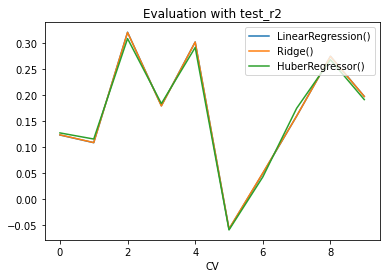

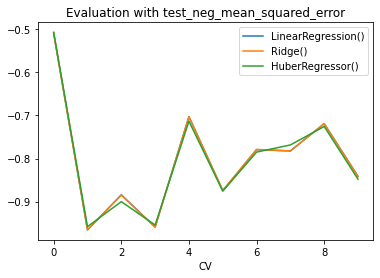

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.model_selection import cross_validate

linearRegression = LinearRegression()
ridgeRegression = Ridge()
HuberRegression = HuberRegressor()

regs = []
regs.extend([linearRegression, ridgeRegression, HuberRegression])

metrics = ['test_r2', 'test_neg_mean_squared_error']

def evaluate(data):
    scores = []
    for metric in metrics:
        plt.figure()
        plt.title("Evaluation with " + str(metric))
        print(metric)
        for reg in regs:
            score = cross_validate(reg, data, y, cv=10, scoring=('r2', 'neg_mean_squared_error'))
            scores.append(score)
            plt.plot(score[metric], label=str(reg))
            plt.xlabel("CV")
            plt.legend(loc="upper right")
            print(str(reg))
            print(str(score[metric]))
            print("Average of scores: " + str(np.average(score[metric])))
        print()
        plt.savefig(str(metric) + 'plot.eps',format='eps')

evaluate(X)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


test_r2
LinearRegression()
[ 0.12353972  0.10880717  0.3208986   0.17964354  0.30223186 -0.05720802
  0.04997862  0.15985814  0.2747574   0.1977076 ]
Average of scores: 0.1660214629069363
Ridge()
[ 0.1237981   0.10893493  0.32064071  0.17941997  0.30211545 -0.05665725
  0.05060565  0.15987322  0.27456293  0.19744427]
Average of scores: 0.16607379758093987
HuberRegressor()
[ 0.1275802   0.11580408  0.30867801  0.18380945  0.29167813 -0.05873519
  0.04302483  0.17484881  0.26806984  0.19154901]
Average of scores: 0.1646307178420857

test_neg_mean_squared_error
LinearRegression()
[-0.50893679 -0.96582242 -0.88423245 -0.95925409 -0.70255994 -0.87453085
 -0.77932532 -0.78234414 -0.7189248  -0.84163603]
Average of scores: -0.8017566831938149
Ridge()
[-0.50878676 -0.96568396 -0.88456824 -0.95951551 -0.70267715 -0.87407525
 -0.77881096 -0.78233011 -0.71911757 -0.84191227]
Average of scores: -0.8017477772506796
HuberRegressor()
[-0.50659059 -0.95823958 -0.90014441 -0.95438284 -0.71318614 -0.875

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean of X unscaled: 0.17711515674684253
var of X unscaled: 49.59822809430775
var of X scaled: -8.881784197001253e-19
var of X scaled: 1.0000000000000009


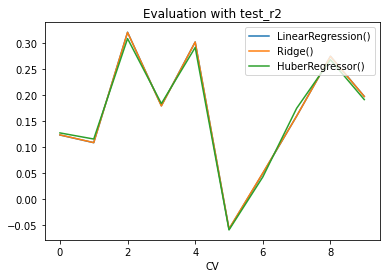

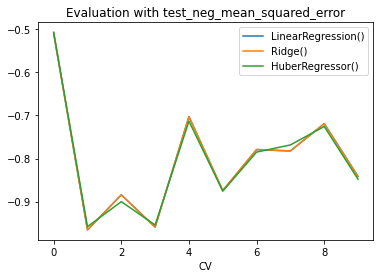

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

evaluate(X_scaled)

print("mean of X unscaled: " +str(X.mean()))
print("var of X unscaled: " + str(X.var()))
print("var of X scaled: " + str(X_scaled.mean()))
print("var of X scaled: " + str(X_scaled.var()))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


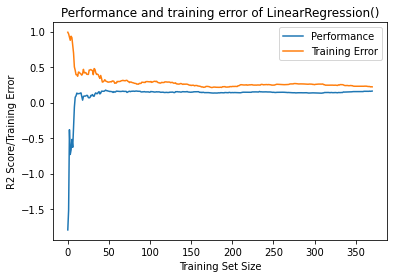

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

def plotLearningCurve(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    for model in models:                    #iterate over list of chosen models
        scores = []
        train_error = []                    #create lists to save our results 
        for x in range(1, len(X_train)+1):  #iterate over length of training set, start with one sample
            X_learn = X_train[0:x]
            y_learn = y_train[0:x]          #slice arrays appropriately
            reg = model.fit(X_learn, y_learn)          #fit regression on available data
            if(x > 4):
                scores.append(reg.score(X_test, y_test))    #add score on Testset to list of scores
                if(len(X_learn) > 1):                       #trainingset must contain more than one sample to calculate train_error 
                    train_error.append(reg.score(X_learn[:-1], y_learn[:-1]))  #add currect error to list
        plt.title("Performance and training error of " + str(model))
        plt.plot(range(0,len(scores)),scores, label='Performance' )
        plt.xlabel("Training Set Size")
        plt.ylabel("R2 Score/Training Error")
        #plt.title("Training error of " +str(model))
        #plt.xlabel("Training Set Size")
        #plt.ylabel("R2 Score")
        plt.plot(range(0,len(train_error)),train_error, label='Training Error')         #plot our results
        plt.legend()
        title = 'learningcurve.eps'
        plt.savefig(title,format='eps')
        plt.show()
    
lin_reg = LinearRegression()
rid_reg = Ridge()
hub_reg = HuberRegressor()
neigh = KNeighborsRegressor()

models = [lin_reg]

plotLearningCurve(models, X, y)

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


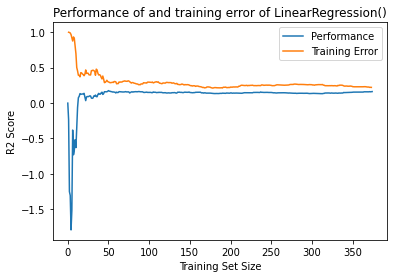

In [6]:
def plotLearningCurve_rwd(models, X, y,step,name=''):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    for model in models:                    #iterate over list of chosen models
        scores = []
        train_error = []                    #create lists to save our results 
        for x in range(step, len(X_train)+1,step):  #iterate over length of training set, start with one sample
            X_learn = X_train[0:x]
            y_learn = y_train[0:x]          #slice arrays appropriately
            reg = model.fit(X_learn, y_learn)           #fit regression on available data
            scores.append(reg.score(X_test, y_test))    #add score on Testset to list of scores
            if(len(X_learn) > 1):                       #trainingset must contain more than one sample to calculate train_error 
                train_error.append(reg.score(X_learn[:-1], y_learn[:-1]))  #add currect error to list
        plt.title("Performance of and training error of " + str(model))
        plt.plot(range(0,len(scores)*step,step),scores, label='Performance' )
        plt.xlabel("Training Set Size")
        plt.ylabel("R2 Score")
        #plt.title("Training error of " +str(model))
        #plt.xlabel("Training Set Size")
        #plt.ylabel("R2 Score")
        plt.plot(range(0,len(train_error)*step,step),train_error, label='Training Error')         #plot our results
        plt.legend()
        title = 'learningcurve'+str(model)+'.eps'
        plt.savefig(title,format='eps')
        plt.show()
        
plotLearningCurve_rwd(models, X, y, 1, "name")

In [7]:
import pandas as pd
#real data set
#explorative analysis
real_world = np.load('real_world.npz')
print(real_world.files)#labels
X = real_world['X']
Y = real_world['y']
features = real_world['features']

print('size:',[X.size,Y.size,features.size])
print('dimensionen:',[X.ndim,Y.ndim,features.ndim])
print('shape:',[X.shape,Y.shape,features.shape])
print('type:',[X.dtype,Y.dtype,features.dtype])

print(features)

['X', 'y', 'features']
size: [14600, 1460, 10]
dimensionen: [2, 2, 1]
shape: [(1460, 10), (1460, 1), (10,)]
type: [dtype('int64'), dtype('int64'), dtype('<U11')]
['LotArea' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'WoodDeckSF'
 'OpenPorchSF' '3SsnPorch' 'ScreenPorch' 'PoolArea']


In [8]:

#create panda data frame
X_Y = np.concatenate((X,Y),axis=1)
features_Y = np.append(features,'SalesPrice')
price_df = pd.DataFrame(X_Y, columns=features_Y)
price_df
price_df.describe()

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalesPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1057.429452,1162.626712,346.992466,1515.463699,94.244521,46.660274,3.409589,15.060959,2.758904,180921.195890
std,9981.264932,438.705324,386.587738,436.528436,525.480383,125.338794,66.256028,29.317331,55.757415,40.177307,79442.502883
min,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000
75%,11601.500000,1298.250000,1391.250000,728.000000,1776.750000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000
max,215245.000000,6110.000000,4692.000000,2065.000000,5642.000000,857.000000,547.000000,508.000000,480.000000,738.000000,755000.000000


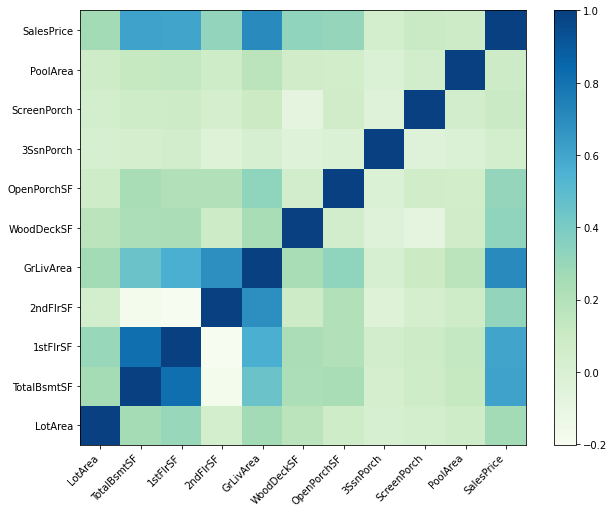

<Figure size 432x288 with 0 Axes>

In [9]:
#heatmap of correlations
corr_matrix = price_df.corr()

fig, ax = plt.subplots(figsize=(10,8))
heatmap = ax.pcolormesh(corr_matrix, cmap='GnBu', shading='auto')
ax.set_yticks(np.arange(0,11)+0.5, minor=False)
ax.set_xticks(np.arange(0,11)+0.5, minor=False)
ax.set_xticklabels(features_Y, minor=False)
ax.set_yticklabels(features_Y, minor=False)
fig.colorbar(heatmap)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('heatmap_realworld.png',dpi=300,format='png')

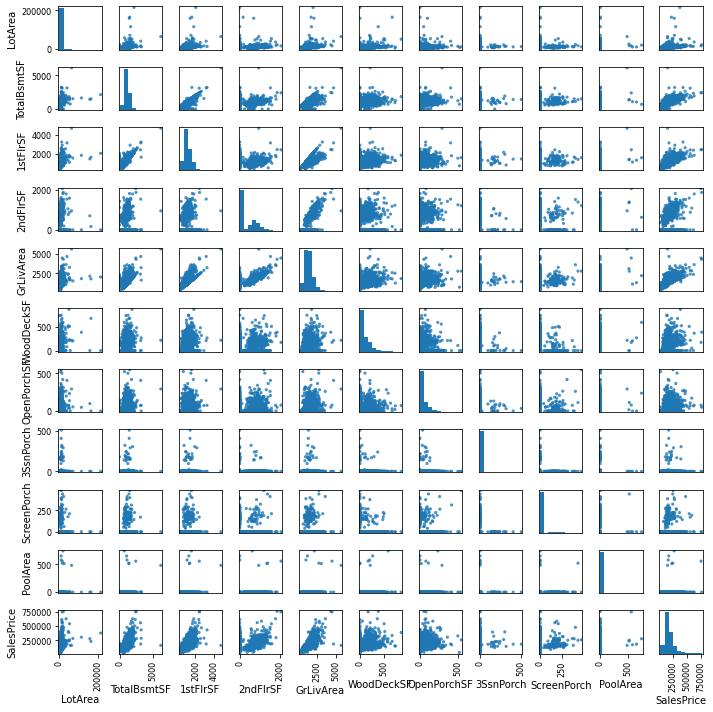

In [10]:
#plot a scatter matrix
#https://stackoverflow.com/questions/56188305/matplotlib-to-plot-a-pairplot/56189280
pd.plotting.scatter_matrix(price_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 0.8)
plt.tight_layout()

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

def train_model(data,model,k=10, y_value = 'SalesPrice',train_model=False):
    '''
    parameters: 
        data: data used for training the model
        model: which model should be used(linear,ridge,huber)
        k: k-fold cross validation
        y_value = which column of the data frame is our y value we want to decsribe
    
    function:
        evaluate a model with a k fold cross validation
        optional: return optimal model
    '''
    
    #reshaping
    num_features = len(data.columns)
    X = data.iloc[:,0:num_features-1]
    y = np.array(data.iloc[:,num_features-1:num_features]).ravel()
    
    #create a K-Fold object with k splits
    folds = KFold(n_splits = k,shuffle = True, random_state = 79)

    #create cross validation with scoring for R² and MSE and print the mean values
    score_r2 = cross_val_score(model,X,y,scoring = 'r2',cv=folds)
    score_mse = cross_val_score(model,X,y,scoring = 'neg_mean_squared_error',cv=folds)
    print('Mean CV for R² scoring:', np.mean(score_r2))
    print('Mean CV for Negative Mean Squared Error :',np.mean(score_mse))
    
    #if you want to return a trained model to get coef
    if train_model:
        #split into train and test data
        testsize = 1/k
        trainsize = 1-testsize
        df_train, df_test = train_test_split(data, train_size = trainsize, test_size = testsize, random_state=89)

        #reshaping
        X_train = df_train.drop(y_value,axis=1)
        y_train = df_train.pop(y_value)
        X_test = df_test.drop(y_value,axis=1)
        y_test = df_test.pop(y_value)
        
        #train our model
        model.fit(X_train,y_train)
        # predict the y values  
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print('R² scoring:',r2)
        print('Mean Squared Error:',mse)
        
        return model


In [12]:
def gridsearch(data, model, hyperparameter = 0,ridge=False,huber=False,lasso=False,k=10, y_value = 'SalesPrice'):
    '''
    parameters: 
        data: data used for training the model
        model: which model should be used(linear,ridge,huber)
        hyperparameters: range of hyperparameters we want to test
        ridge,huber,lasso: for which of the three models do we want the optimal hyperparameter
        k: k-fold cross validation
        y_value = which column of the daat frame is our y value we want to decsribe
    
    function:
        find the best hyperparameters for a Ridge, Huber or Lasso Regression with a k fold cross validation
    '''
     
    if ridge or lasso:
        parameters = {'alpha': hyperparameter}
        
    if huber:
        parameters = {'epsilon': hyperparameter}
             
    #create a K-Fold object with k splits
    folds = KFold(n_splits = k,shuffle = True, random_state = 79)
    #reshaping
    num_features = len(data.columns)
    X = data.iloc[:,0:num_features-1]
    y = np.array(data.iloc[:,num_features-1:num_features]).ravel()
    
    gridsearch_r2 = GridSearchCV(model, parameters, scoring='r2',cv=folds)
    gridsearch_mse = GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=folds)
    gridsearch_r2.fit(X,y)
    gridsearch_mse.fit(X,y)
    print('Hyperparameter with R² scoring:' ,gridsearch_r2.best_params_)
    print('Hyperparameter with Negative Mean Suqared Error:',gridsearch_mse.best_params_)
    return([gridsearch_r2.best_params_,gridsearch_mse.best_params_])

In [13]:
#1 step: training the regression models for the given data ############################################################
#linear regression
linear_reg = LinearRegression()
train_model(price_df,linear_reg,10)
print()
#ridge regression
ridge_reg = Ridge()
train_model(price_df,ridge_reg)
print()
#huber regression
huber_reg = HuberRegressor(max_iter=25600)
train_model(price_df,huber_reg)
print()

Mean CV for R² scoring: 0.5872247151938683
Mean CV for Negative Mean Squared Error : -2523148192.4287176

Mean CV for R² scoring: 0.587224726575634
Mean CV for Negative Mean Squared Error : -2523148115.132381

Mean CV for R² scoring: 0.6042451345941148
Mean CV for Negative Mean Squared Error : -2409501117.8272676



In [14]:
#Step 2: standardize Date with the mean and sd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(price_df)
scaledData = scaler.transform(price_df)

df_normalized =  pd.DataFrame(scaledData, columns=features_Y)
df_normalized.head()


,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalesPrice
0,-0.207142,-0.459303,-0.793434,1.161852,0.370333,-0.752176,0.216503,-0.116339,-0.270208,-0.068692,0.347273
1,-0.091886,0.466465,0.257140,-0.795163,-0.482512,1.626195,-0.704483,-0.116339,-0.270208,-0.068692,0.007288
2,0.073480,-0.313369,-0.627826,1.189351,0.515013,-0.752176,-0.070361,-0.116339,-0.270208,-0.068692,0.536154
3,-0.096897,-0.687324,-0.521734,0.937276,0.383659,-0.752176,-0.176048,-0.116339,-0.270208,-0.068692,-0.515281
4,0.375148,0.199680,-0.045611,1.617877,1.299326,0.780197,0.563760,-0.116339,-0.270208,-0.068692,0.869843


In [15]:
#Step 3: Train models again and find the optimal hyperparameters this time
#linear regression
linear_reg_norm = LinearRegression()
train_model(df_normalized,linear_reg,10)
print()

Mean CV for R² scoring: 0.5872247151938683
Mean CV for Negative Mean Squared Error : -0.40006861785251563



In [16]:
#ridge regression
ridge_reg_norm = Ridge()
result_gridesearch_norm = gridsearch(df_normalized,ridge_reg_norm,ridge=True,hyperparameter=np.arange(0,10,0.1))

Hyperparameter with R² scoring: {'alpha': 2.1}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 1.7000000000000002}


In [17]:
ridge_reg_norm_1 = ridge_reg_norm.set_params(**{'alpha':2.1})
print('Ridge Regression CV for alpha = 2.1 :')
train_model(df_normalized,ridge_reg_norm_1)
print()
ridge_reg_norm_2 = ridge_reg_norm.set_params(**{'alpha':1.7})
print('Ridge Regression CV for alpha = 1.7 :')
train_model(df_normalized,ridge_reg_norm_2)


Ridge Regression CV for alpha = 2.1 :
Mean CV for R² scoring: 0.5874944832050201
Mean CV for Negative Mean Squared Error : -0.39987929503765246

Ridge Regression CV for alpha = 1.7 :
Mean CV for R² scoring: 0.5874902072572656
Mean CV for Negative Mean Squared Error : -0.39987334206548963


In [18]:
#huber regression
huber_reg_norm = HuberRegressor(max_iter=25600)
result_gridesearch_huber_norm = gridsearch(df_normalized,huber_reg_norm,huber=True,hyperparameter=np.arange(1,1.5,0.001))


Hyperparameter with R² scoring: {'epsilon': 1.4099999999999548}
Hyperparameter with Negative Mean Suqared Error: {'epsilon': 1.4339999999999522}


In [19]:
huber_reg_norm_1 = huber_reg_norm.set_params(**{'epsilon':1.41})
print('Huber Regression CV for epsilon = 1.41 :')
train_model(df_normalized,huber_reg_norm_1)
print()
huber_reg_norm_2 = huber_reg_norm.set_params(**{'epsilon':1.434})
print('Huber Regression CV for epsilon = 1.434 :')
train_model(df_normalized,huber_reg_norm)
print()


Huber Regression CV for epsilon = 1.41 :
Mean CV for R² scoring: 0.6086441768456861
Mean CV for Negative Mean Squared Error : -0.3767585554701413

Huber Regression CV for epsilon = 1.434 :
Mean CV for R² scoring: 0.608622109678697
Mean CV for Negative Mean Squared Error : -0.3767387418534289



In [20]:
#Step 4: Feature selection #######################################################################################
#f measure = pearson correlation
from scipy.stats import pearsonr

fmeasure = []
y = np.array(df_normalized.iloc[:,10:11]).ravel()
for feature in df_normalized.iloc[:,0:10]:
    fmeasure.append((pearsonr(np.array(df_normalized[feature]).ravel(),y)[0]))
    
#all feature above mean fmeasure will be selected
mean_fmeasure = np.mean(fmeasure[0])

mostRelFeatAccMeanF = [feature for i,feature in enumerate(df_normalized.iloc[:,0:10]) if fmeasure[i] >= mean_fmeasure]
print(f"Features with an f measure above the average f measure of {round(mean_fmeasure,2)} are", ' '.join(mostRelFeatAccMeanF))

df_fmeasure = pd.DataFrame(df_normalized[mostRelFeatAccMeanF])
df_fmeasure['SalesPrice']=y

Features with an f measure above the average f measure of 0.26 are LotArea TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF


In [21]:
#feature selection with lasso regression:
#fit lasso regression on a scaled version of our data set and only use the fatures that have a coefficient != 0
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
result_gridesearch_lasso = gridsearch(df_normalized,lasso_reg,lasso=True,hyperparameter=np.arange(0.1,10,0.01))


Hyperparameter with R² scoring: {'alpha': 0.1}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 0.1}


In [22]:
lasso_reg.set_params(**{'alpha':0.1})
lasso_reg = train_model(df_normalized,lasso_reg,train_model=True)
lasso_reg_coef = lasso_reg.coef_
print('Coefficients for Lasso Regression Model for alpha = 0.1 :',lasso_reg_coef)

#all feature where coef != 0 will be selected 
mostRelFeatAccLasso = [feature for i,feature in enumerate(df_normalized.iloc[:,0:10]) if lasso_reg_coef[i] != 0]
print("\nFeatures with an f measure above the average are", ' '.join(mostRelFeatAccLasso))

#data frame with reduced features
df_lasso = pd.DataFrame(df_normalized[mostRelFeatAccLasso])
df_lasso['SalesPrice']=y

Mean CV for R² scoring: 0.5787072605653358
Mean CV for Negative Mean Squared Error : -0.4102896831082292
R² scoring: 0.6207837514059124
Mean Squared Error: 0.6076169190775667
Coefficients for Lasso Regression Model for alpha = 0.1 : [ 0.          0.27101183  0.          0.          0.4483906   0.0499191
  0.          0.          0.         -0.        ]

Features with an f measure above the average are TotalBsmtSF GrLivArea WoodDeckSF


In [23]:
#backward selection with SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector

mostRelFeatAccBS_MSE = []
mostRelFeatAccBS_R2 = []
counter = 0
#feature selection for all three Models with the optimal features from step 3
models = [linear_reg,ridge_reg_norm_1,ridge_reg_norm_2,huber_reg_norm_1,huber_reg_norm_2]
for model in models:
    counter+=1
    X = df_normalized.iloc[:,0:10]
    y = np.array(df_normalized.iloc[:,10:11]).ravel()
    sfs_MSE = SequentialFeatureSelector(model, n_features_to_select=5,cv=10,scoring='neg_mean_squared_error',\
                                    direction='backward')
    sfs_MSE.fit(X,y)
    sfs_MSE.get_support()

    backwardselection = sfs_MSE.get_support()
    
    mostRelFeatAccBS_MSE.append([feature for i,feature in enumerate(df_normalized.iloc[:,0:10]) if backwardselection[i]])
    print(counter,"Model: Features in the model with neg MSE are", ' '.join(mostRelFeatAccBS_MSE[counter-1]))
    
    sfs_R2 = SequentialFeatureSelector(model, n_features_to_select=5,cv=10,scoring='r2',\
                                    direction='backward')
    sfs_R2.fit(X,y)
    sfs_R2.get_support()

    backwardselection = sfs_R2.get_support()
    
    mostRelFeatAccBS_R2.append([feature for i,feature in enumerate(df_normalized.iloc[:,0:10]) if backwardselection[i]])
    print(counter,"Model: Features in the model with neg R² are", ' '.join(mostRelFeatAccBS_R2[counter-1]))
    print()


1 Model: Features in the model with neg MSE are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF
1 Model: Features in the model with neg R² are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF

2 Model: Features in the model with neg MSE are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF
2 Model: Features in the model with neg R² are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF

3 Model: Features in the model with neg MSE are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF
3 Model: Features in the model with neg R² are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF

4 Model: Features in the model with neg MSE are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF
4 Model: Features in the model with neg R² are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF

5 Model: Features in the model with neg MSE are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF OpenPorchSF
5 Model: Features in the model with neg R² are TotalBsmtSF 1stFlrSF 2ndFlrSF WoodDeckSF Ope

In [24]:
#for all models we get the same features with the backward selection -> can take any in next row
df_BS = pd.DataFrame(df_normalized[mostRelFeatAccBS_R2[0]])
df_BS['SalesPrice']=y
df_BS.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,SalesPrice
0,-0.459303,-0.793434,1.161852,-0.752176,0.216503,0.347273
1,0.466465,0.257140,-0.795163,1.626195,-0.704483,0.007288
2,-0.313369,-0.627826,1.189351,-0.752176,-0.070361,0.536154
3,-0.687324,-0.521734,0.937276,-0.752176,-0.176048,-0.515281
4,0.199680,-0.045611,1.617877,0.780197,0.563760,0.869843


In [25]:
print('Columns of Feature selected by f_measure:\n' ,df_fmeasure.columns)
print('\nColumns of Feature selected by lasso regression:\n',df_lasso.columns)
print('\nColumns of Feature selected by backward selection:\n',df_BS.columns)

Columns of Feature selected by f_measure:
 Index(['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalesPrice'],
      dtype='object')

Columns of Feature selected by lasso regression:
 Index(['TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'SalesPrice'], dtype='object')

Columns of Feature selected by backward selection:
 Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
       'SalesPrice'],
      dtype='object')


In [26]:
#Step 5: Train the reduced data sets for all three regression models while optimizing hyperparameters
print('Linear Regression Model:')
datasets = {'F Measure':df_fmeasure,'Lasso':df_lasso,'Backward Selection':df_BS}
#linear regression
for selection,data in datasets.items():
    print(selection)
    linear_reg_reduced = LinearRegression()
    train_model(data,linear_reg,10)
    print()

Linear Regression Model:
F Measure
Mean CV for R² scoring: 0.5952973157044822
Mean CV for Negative Mean Squared Error : -0.39020401490384454

Lasso
Mean CV for R² scoring: 0.5918723143139297
Mean CV for Negative Mean Squared Error : -0.39388267886708156

Backward Selection
Mean CV for R² scoring: 0.5974354759161947
Mean CV for Negative Mean Squared Error : -0.38798409776494386



In [27]:
#ridge regression
print('Ridge Regression Model:')
for selection,data in datasets.items():
    print(selection)
    ridge_reg_reduced = Ridge()
    result_gridesearch_reduced = gridsearch(data,ridge_reg_reduced,ridge=True,hyperparameter=np.arange(0,10,0.1))
    r2 = list(result_gridesearch_reduced[0].values())[0]
    mse = list(result_gridesearch_reduced[1].values())[0]

    for item in [r2,mse]:
        
        ridge_reg = Ridge(item)
        ridge_reg = train_model(data,ridge_reg)
        print()
    
    print()
    

Ridge Regression Model:
F Measure
Hyperparameter with R² scoring: {'alpha': 1.7000000000000002}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 1.7000000000000002}
Mean CV for R² scoring: 0.5955331203052309
Mean CV for Negative Mean Squared Error : -0.389970134047117

Mean CV for R² scoring: 0.5955331203052309
Mean CV for Negative Mean Squared Error : -0.389970134047117


Lasso
Hyperparameter with R² scoring: {'alpha': 9.9}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 9.9}
Mean CV for R² scoring: 0.5922014685247118
Mean CV for Negative Mean Squared Error : -0.3937139323184871

Mean CV for R² scoring: 0.5922014685247118
Mean CV for Negative Mean Squared Error : -0.3937139323184871


Backward Selection
Hyperparameter with R² scoring: {'alpha': 9.9}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 9.9}
Mean CV for R² scoring: 0.5978056723623487
Mean CV for Negative Mean Squared Error : -0.38780347158443795

Mean CV for R² scoring: 0.5978056723623487
Mean

In [28]:
#huber regression
print('Huber Regression Model:')
for selection,data in datasets.items():
    print(selection)
    huber_reg_reduced = HuberRegressor(max_iter=25600)
    result_gridesearch_reduced = gridsearch(data,huber_reg_reduced,ridge=True,hyperparameter=np.arange(1,1.5,0.001))
    r2 = list(result_gridesearch_reduced[0].values())[0]
    mse = list(result_gridesearch_reduced[1].values())[0]

    for item in [r2,mse]:
        print(item)
        huber_reg = HuberRegressor(max_iter=25600,epsilon=item)
        huber_reg = train_model(data,huber_reg)
        
        print()
    
    print()
 

Huber Regression Model:
F Measure
Hyperparameter with R² scoring: {'alpha': 1.0}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 1.0}
1.0
Mean CV for R² scoring: 0.6082313618173798
Mean CV for Negative Mean Squared Error : -0.3770527958626254

1.0
Mean CV for R² scoring: 0.6082313618173798
Mean CV for Negative Mean Squared Error : -0.3770527958626254


Lasso
Hyperparameter with R² scoring: {'alpha': 1.498999999999945}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 1.498999999999945}
1.498999999999945
Mean CV for R² scoring: 0.6023045762381166
Mean CV for Negative Mean Squared Error : -0.38290319280533097

1.498999999999945
Mean CV for R² scoring: 0.6023045762381166
Mean CV for Negative Mean Squared Error : -0.38290319280533097


Backward Selection
Hyperparameter with R² scoring: {'alpha': 1.498999999999945}
Hyperparameter with Negative Mean Suqared Error: {'alpha': 1.498999999999945}
1.498999999999945
Mean CV for R² scoring: 0.609442364821606
Mean CV for Negative

In [29]:
# learning curve real world data set
from sklearn.model_selection import train_test_split

def plotLearningCurve_rwd(models, X, y,step,test_size=0.1,name=''):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state=42)
    for model in models:                    #iterate over list of chosen models
        scores = []
        train_error = []                    #create lists to save our results 
        for x in range(step, len(X_train)+1,step):  #iterate over length of training set, start with one sample
            X_learn = X_train[0:x]
            y_learn = y_train[0:x]          #slice arrays appropriately
            reg = model.fit(X_learn, y_learn)           #fit regression on available data
            scores.append(reg.score(X_test, y_test))    #add score on Testset to list of scores
            if(len(X_learn) > 1):                       #trainingset must contain more than one sample to calculate train_error 
                train_error.append(reg.score(X_learn[:-1], y_learn[:-1]))  #add currect error to list
        plt.title("Performance of and training error of " + str(model))
        plt.plot(range(0,len(scores)*step,step),scores, label='Performance' )
        plt.xlabel("Training Set Size")
        plt.ylabel("R2 Score")
        #plt.title("Training error of " +str(model))
        #plt.xlabel("Training Set Size")
        #plt.ylabel("R2 Score")
        plt.plot(range(0,len(train_error)*step,step),train_error, label='Training Error')         #plot our results
        plt.legend()
        title = 'learningcurve'+name+'.eps'
        plt.savefig(title,format='eps')
        plt.show()
        
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


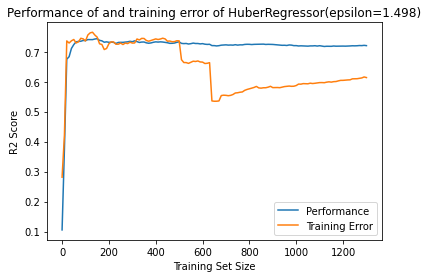

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


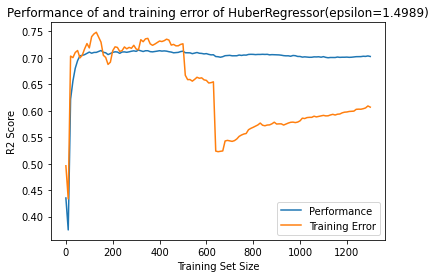

In [30]:
#learning curve for best performing model and the one we would choose, both huber regression
huber_best  = HuberRegressor(epsilon= 1.498)
huber_chosen  = HuberRegressor(epsilon= 1.4989)
models = [huber_best, huber_chosen]

#two different data sub sets
num_features_lasso = len(df_lasso.columns)
X_lasso = df_lasso.iloc[:,0:num_features_lasso-1]
y_lasso = np.array(df_lasso.iloc[:,num_features_lasso-1:num_features_lasso]).ravel()

num_features_bs = len(df_BS.columns)
X_BS = df_BS.iloc[:,0:num_features_bs-1]
y_BS = np.array(df_BS.iloc[:,num_features_bs-1:num_features_bs]).ravel()

#best model
plotLearningCurve_rwd([huber_best],X_BS,y_BS,10,name='best')
plotLearningCurve_rwd([huber_chosen],X_lasso,y_lasso,10,name='chosen')
